# Heuristic Compatibility Testing

In [2]:
# Import Libraries
import sys
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src import heuristics

mpl.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 20,
    'axes.titlesize': 32,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 20,
    'figure.titlesize': 28,
    'axes.grid': False,
    'grid.color': 'grey',
    'grid.linestyle': '--',
    'grid.linewidth': 1.0,
})

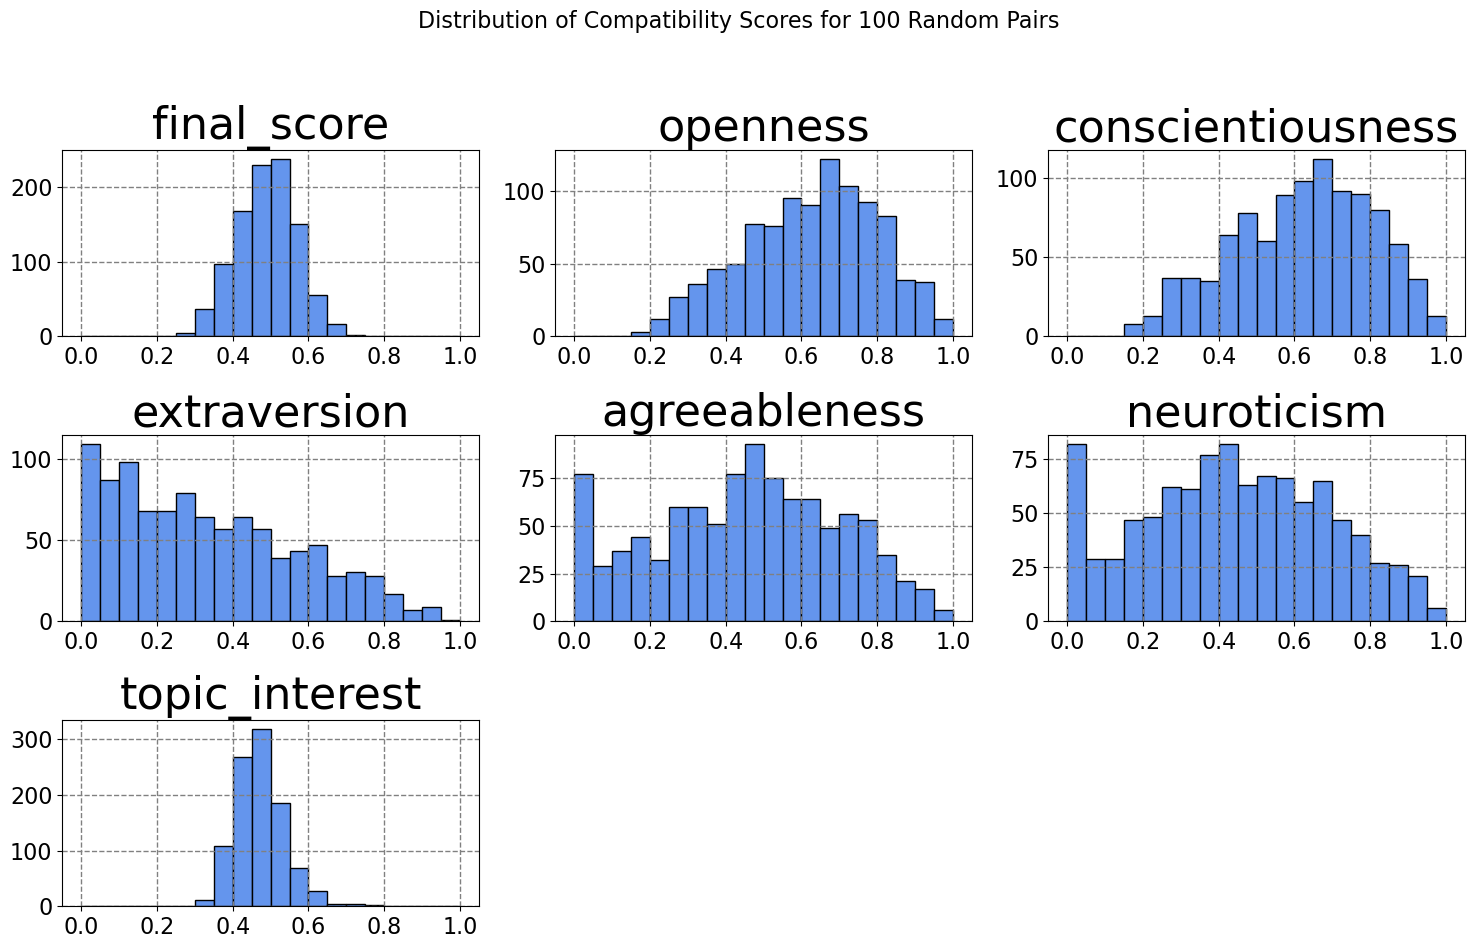

In [3]:
num_pairs = 1000
mock_topic_vec = [0.5, 0.5, 0.5, 0.5, 0.5]
mock_topic_vec = [0.6, 0.3, 0.1, 0.1, 0.9]

results = {"final_score": [],
           "openness": [],
           "conscientiousness": [],
           "extraversion": [],
           "agreeableness": [],
           "neuroticism": [],
           "topic_interest": []}

for _ in range(num_pairs):

    p1 = np.random.rand(5).tolist()
    p2 = np.random.rand(5).tolist()

    result = heuristics.calculate_heuristic_score(p1, p2, mock_topic_vec)

    results["final_score"].append(result["match_score"])
    
    breakdown = result["breakdown"]
    results["openness"].append(breakdown["openness"])
    results["conscientiousness"].append(breakdown["conscientiousness"])
    results["extraversion"].append(breakdown["extraversion"])
    results["agreeableness"].append(breakdown["agreeableness"])
    results["neuroticism"].append(breakdown["neuroticism"])
    results["topic_interest"].append(breakdown["topic_interest"])

results_df = pd.DataFrame(results)

results_df.hist(bins=20, figsize=(15, 10), layout=(3, 3), color='cornflowerblue', edgecolor='black', range=(0, 1))
plt.suptitle('Distribution of Compatibility Scores for 100 Random Pairs', size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
persona_ideal_match_1 = [0.9, 0.8, 0.7, 0.9, 0.1] # This person is open, conscientious, extraverted, agreeable, but not neurotic.
persona_ideal_match_2 = [0.9, 0.8, 0.2, 0.9, 0.1] # This person is similar in every way, but is introverted.

persona_stable_similar_1 = [0.5, 0.7, 0.5, 0.8, 0.1] # Middling openness, relatively high conscientiousness, middling extraversion, highly agreeable, and not neurotic.
persona_stable_similar_2 = [0.5, 0.7, 0.5, 0.8, 0.1] # Identical stable profiles

persona_volatile_clash_1 = [0.4, 0.3, 0.9, 0.2, 0.8] # Low openess and conscinetiousness, highly extraverted and neurotics and not agreeable
persona_volatile_clash_2 = [0.4, 0.3, 0.9, 0.2, 0.8] # Identical volatile profiles

persona_awkward_introverts = [0.6, 0.6, 0.1, 0.7, 0.6] # Middling in all departments but socially awkward
persona_awkward_introverts_2 = [0.6, 0.6, 0.1, 0.7, 0.6] # Identical awkward profiles

persona_argumentative = [0.8, 0.8, 0.7, 0.1, 0.2] # Highly open, conscientious, and extraverted and stable, but not agreeable
persona_argumentative_2 = [0.8, 0.8, 0.7, 0.1, 0.2] # Identical argumentative profiles


# Consistent Mock Topic Vector
mock_topic_vec = [0.9, 0.9, 0.9, 0.9, 0.9]
mock_topic_vec = [0.5, 0.5, 0.5, 0.5, 0.5]

In [5]:
print("--- Testing Heuristic Compatibility ---")

# Test 1: Ideal Complementary Match (Expect HIGH score)
score1 = heuristics.calculate_heuristic_score(persona_ideal_match_1, persona_ideal_match_2, mock_topic_vec)
print(f"\nIdeal Complementary Match:")
print(f"  Score: {score1['match_score']:.2f}")
print(f"  Explanation: {score1['explanation']}")

# Test 2: Stable Similar Match (Expect MODERATE-HIGH score)
score2 = heuristics.calculate_heuristic_score(persona_stable_similar_1, persona_stable_similar_2, mock_topic_vec)
print(f"\nStable Similar Match:")
print(f"  Score: {score2['match_score']:.2f}")
print(f"  Explanation: {score2['explanation']}")

# Test 3: Volatile Clash (Expect LOW score)
score3 = heuristics.calculate_heuristic_score(persona_volatile_clash_1, persona_volatile_clash_2, mock_topic_vec)
print(f"\nVolatile Clash:")
print(f"  Score: {score3['match_score']:.2f}")
print(f"  Explanation: {score3['explanation']}")

# Test 4: Awkward Introverts (Expect MIDDLING score)
score4 = heuristics.calculate_heuristic_score(persona_awkward_introverts, persona_awkward_introverts_2, mock_topic_vec)
print(f"\nAwkward Introverts:")
print(f"  Score: {score4['match_score']:.2f}")
print(f"  Explanation: {score4['explanation']}")

# Test 5: Argumentative Pair (Expect MODERATE-LOW score)
score5 = heuristics.calculate_heuristic_score(persona_argumentative, persona_argumentative_2, mock_topic_vec)
print(f"\nArgumentative Pair:")
print(f"  Score: {score5['match_score']:.2f}")
print(f"  Explanation: {score5['explanation']}")

--- Testing Heuristic Compatibility ---

Ideal Complementary Match:
  Score: 0.76
  Explanation: Final Score: 0.76.Key Drivers: Stability (0.90) and agreeableness (0.90)

Stable Similar Match:
  Score: 0.66
  Explanation: Final Score: 0.66.Key Drivers: Stability (0.90) and agreeableness (0.79)

Volatile Clash:
  Score: 0.35
  Explanation: Final Score: 0.35.Key Drivers: Stability (0.04) and agreeableness (0.04)

Awkward Introverts:
  Score: 0.59
  Explanation: Final Score: 0.59.Key Drivers: Stability (0.31) and agreeableness (0.68)

Argumentative Pair:
  Score: 0.48
  Explanation: Final Score: 0.48.Key Drivers: Stability (0.79) and agreeableness (0.00)


In [ ]:
# Test the impact of the topic vector once the social cue score is added.